Forecasting sales for a month for each shop for each product.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)


In [140]:
item_cat = pd.read_csv("item_categories_en.csv")
item_cat.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [141]:
items = pd.read_csv("items_en.csv")
items.head()

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40


In [142]:
shops = pd.read_csv("shops_en.csv")
shops.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4


Need to check for duplicates

In [143]:
item_cat['item_category_name'] = item_cat['item_category_name'].str.strip().str.lower()
item_cat['item_category_name'].duplicated().any()

False

In [144]:
shops['shop_name'] = shops['shop_name'].str.strip().str.lower()
shops['shop_name'].duplicated().any()

False

In [145]:
items['item_name'] = items['item_name'].str.strip().str.lower()
items['item_name'].duplicated().any()

True

In [146]:
duplicated_items = items[items['item_name'].duplicated()]
new_items = items.drop_duplicates(subset = ['item_name'])
print(duplicated_items.shape[0])
duplicated_items

63


,item_name,item_id,item_category_id
747,1c: cognitive collection. howcast. world art (...,747,77
946,2012 (region),946,40
8248,scarlet sails (region),8248,40
8299,андрей рублев (регион),8299,40
8423,afss (region),8423,40
8617,барби в роли принцессы острова (регион),8617,40
8623,barbie and the dragon (region),8623,40
8633,barbie: 12 dancing princesses (region),8633,40
8643,barber: mari̇posa (region),8643,40
8731,crazy day or the marriage of figaro (region),8731,40


For the duplicated item names, I check for the item_id in the train and test set and change the item_id into 1 id!

In [147]:
train = pd.read_csv("sales_train.csv")
train['date'] = pd.to_datetime(train['date'], format = "%d.%m.%Y")
train.sort_values(by = 'date')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [148]:
joined_train = pd.merge(train, items, how='inner', on='item_id')
print(train.shape[0])
print(joined_train.shape[0])

2935849
2935849


In [149]:
## Change the item_id:

joined_train_here = pd.merge(joined_train, new_items.loc[:, ['item_name', 'item_id']], 
                        on='item_name', how='left', suffixes=('', '_dup'))

# Replace the original 'item_id' with the merged one
different_ids = joined_train_here['item_id'] != joined_train_here['item_id_dup']
print(joined_train_here[different_ids].shape[0])

# Replace 'item_id' with 'item_id_dup' where they are different
joined_train_here.loc[different_ids, 'item_id'] = joined_train_here.loc[different_ids, 'item_id_dup']

# Drop the duplicated 'item_id' column
train_drop_dup = joined_train_here.drop(columns=['item_id_dup'])


9119


In [150]:
test = pd.read_csv("test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [151]:
# do the same with test data:
## Change the item_id:
joined_test = pd.merge(test, items, how='inner', on='item_id')

In [152]:

joined_test_here = pd.merge(joined_test, new_items.loc[:, ['item_name', 'item_id']], 
                        on='item_name', how='left', suffixes=('', '_dup'))

# Replace the original 'item_id' with the merged one
different_ids = joined_test_here['item_id'] != joined_test_here['item_id_dup']
print(joined_test_here[different_ids].shape[0])

# Replace 'item_id' with 'item_id_dup' where they are different
joined_test_here.loc[different_ids, 'item_id'] = joined_test_here.loc[different_ids, 'item_id_dup']

# Drop the duplicated 'item_id' column
test_drop_dup = joined_test_here.drop(columns=['item_id_dup'])


252


<Axes: xlabel='item_price'>

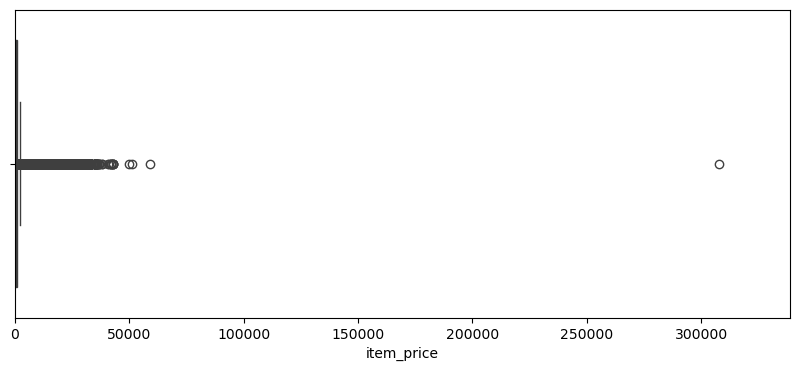

In [153]:
plt.figure(figsize=(10,4))
plt.xlim(train_drop_dup.item_price.min(), train_drop_dup.item_price.max()*1.1)
sns.boxplot(x=train_drop_dup.item_price)


Check out the outlier 300k first:

In [154]:
id_outliers = train_drop_dup.loc[train_drop_dup['item_price']>300000, 'item_id']
train_drop_dup[train_drop_dup['item_id'].isin(id_outliers)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
2163826,2013-12-13,11,12,6066,307980.0,1.0,radmin 3 - 522 лиц.,75


Since there's only 1 purchase for the whole dataset, I'll drop this. Then move on to other prices.

In [155]:
train_drop_dup = train_drop_dup[~train_drop_dup['item_id'].isin(id_outliers)]

<Axes: xlabel='item_price'>

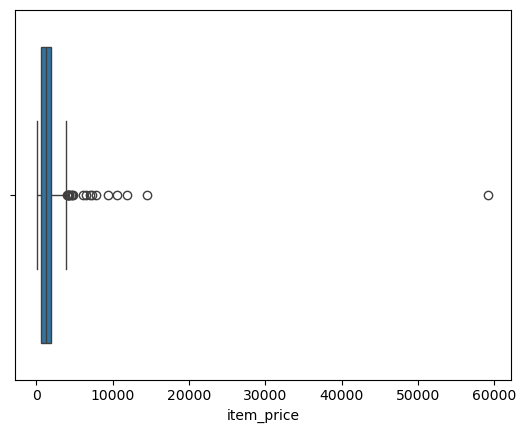

In [156]:
id_outliers = train_drop_dup.loc[train_drop_dup['item_price']>50000, 'item_id']

temp_df = train_drop_dup[train_drop_dup['item_id']==id_outliers.iloc[0]]
sns.boxplot(x=temp_df.item_price)

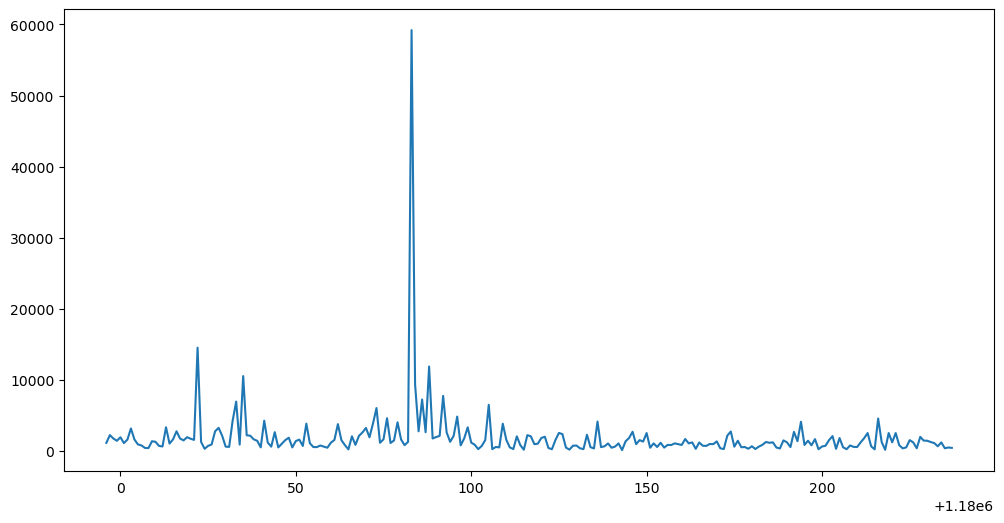

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(temp_df[temp_df['shop_id']==12]['item_price'])
plt.show()

We can see that the price of this game fluctuates over time, but only a few times does it get so expensive, and with the same shop_id. I doubt that the prices are mistyped.

I decided to fill the price higher than 9k with the past most recent price.

In [158]:
mask = (train_drop_dup['item_id']==id_outliers.iloc[0]) & (train_drop_dup['item_price'] > 9000)

# Apply the shift within groups:
train_drop_dup['item_price_shifted'] = train_drop_dup.groupby('item_id')['item_price'].shift(1)

# Fill the outliers based on the mask
train_drop_dup.loc[mask, 'item_price'] = train_drop_dup.loc[mask, 'item_price_shifted']


In [159]:
train_drop_dup[train_drop_dup['item_id']==id_outliers.iloc[0]]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_price_shifted
1179996,2013-01-09,0,12,11365,1148.000000,5.0,shipping (ems),9,NaN
1179997,2013-01-10,0,12,11365,2235.000000,2.0,shipping (ems),9,1148.000000
1179998,2013-01-14,0,12,11365,1753.333333,3.0,shipping (ems),9,2235.000000
1179999,2013-01-15,0,12,11365,1435.000000,2.0,shipping (ems),9,1753.333333
1180000,2013-01-16,0,12,11365,1930.000000,1.0,shipping (ems),9,1435.000000
1180001,2013-01-17,0,12,11365,1115.000000,6.0,shipping (ems),9,1930.000000
1180002,2013-01-21,0,12,11365,1600.000000,1.0,shipping (ems),9,1115.000000
1180003,2013-01-24,0,12,11365,3170.000000,1.0,shipping (ems),9,1600.000000
1180004,2013-01-25,0,12,11365,1620.000000,1.0,shipping (ems),9,3170.000000
1180005,2013-01-28,0,12,11365,920.000000,1.0,shipping (ems),9,1620.000000


In [ ]:

# Drop the temporary 'item_price_shifted' column
train_drop_dup.drop(columns=['item_price_shifted'], inplace=True)


In [54]:
# Move on to the next outliers:
temp_df = train_drop_dup[train_drop_dup['item_id']==id_outliers.iloc[1]]
temp_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
2294618,2014-03-20,14,25,13199,50999.0,1.0,collector chess (rings),69


Same situation, there's only 1 purchase for the whole time. So I drop this out.

In [80]:
train_drop_dup = train_drop_dup[train_drop_dup['item_id']!=id_outliers.iloc[1]]

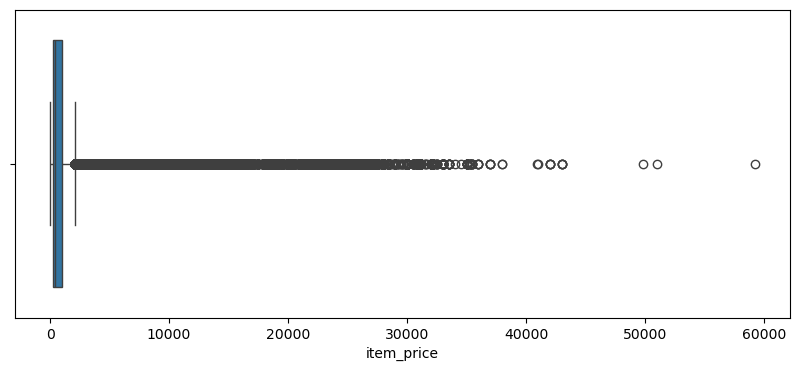

In [161]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train_drop_dup.item_price)
plt.show()